# Visualize i/p tensor

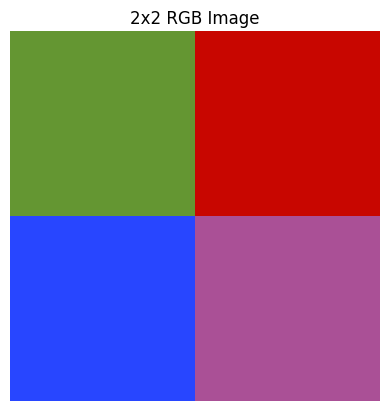

In [133]:
# VISUALIZE INPUT TENSORS OF SHAPE: [batch_size, channels, height, width]

# eg.
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# (example values) -> pixel values between 0 to 255
tensor = torch.tensor([[
    [[100,200], [40,170]],  # Red channel
    [[150,6], [70,80]],  # Green channel
    [[50,0], [255,150]]   # Blue channel
]])

# Convert to numpy and prepare for visualization
image = tensor.squeeze(0)  # Remove batch dimension -> 3x2x2
image = image.permute(1, 2, 0)  # Change to HxWxC format -> 2x2x3
image = image.numpy()  # Convert to numpy array

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title('2x2 RGB Image')
plt.show()

# Function to plot tensor

In [134]:
# FUNCTION TO PLOT TENSOR
def plot_tensor(input_tensor, title="", grid=True, sample_image=False):

    if input_tensor.requires_grad:
        image = input_tensor.detach().squeeze(0).permute(1, 2, 0).numpy()
    else:
        image = input_tensor.squeeze(0).permute(1, 2, 0).numpy()
    
    #image = input_tensor.squeeze(0).permute(1, 2, 0).numpy() # Remove batch dimension and change to HxWxC and convert to numpy
    
    plt.figure(figsize=(8,8))
    if sample_image:
        plt.imshow(image) # Normalization is not required for sample images since ToTensor() already normalizes them.
    else:
        plt.imshow(image/255) # Normalize pixel values to 0-1
    if grid:
        plt.grid(which='both', color='white', linestyle='-', linewidth=0.5) # draw grid lines for better visualization
        plt.xticks(np.arange(-0.5, image.shape[1], 1)) # Show grid lines for every pixel
        plt.yticks(np.arange(-0.5, image.shape[0], 1)) 
    plt.title(f"{title} {image.shape[:2]}") 
    plt.show()

# test patterns

In [135]:
# test pattern: b/w 1
input = torch.zeros(1, 3, 4, 4)
input[0,:,0,0] = 1    # Red
input[0,:,2,2] = 1    # Green
input[0,:,3,3] = 1    # Blue
input = input * 255   # Scale to 0-255

# test pattern: color
# tensor of shape 1x3x30x30 with random values ranging from 0 to 255
color_input = torch.randint(0, 256, (1, 3, 8, 8), dtype=torch.float32)

# Nearest Interplotation

For each new pixel in the output image, take the value of the closest original pixel.

## B/W image

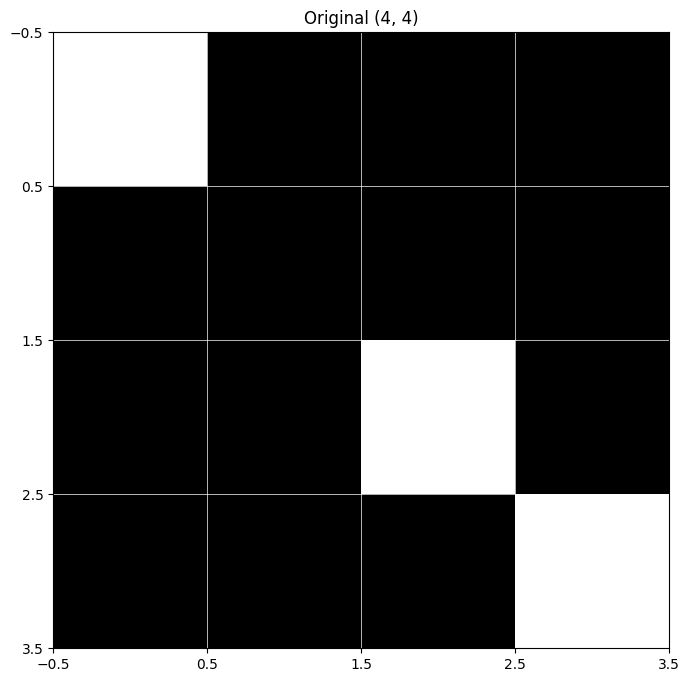

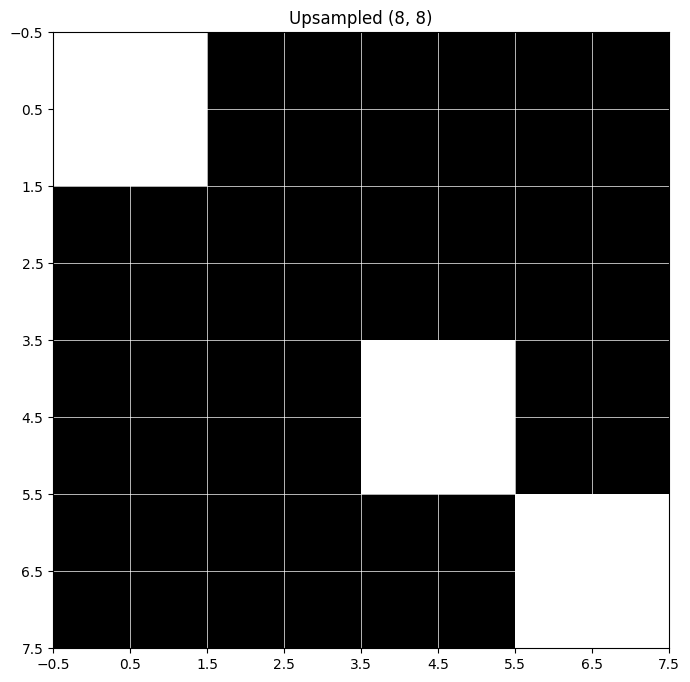

In [136]:
# NEAREST INTERPOLATION

plot_tensor(input, "Original")

# Upsample with very large scaling
nearest2_ = nn.Upsample(scale_factor=2, mode='nearest')
res = nearest2_(input)
plot_tensor(res, "Upsampled")

## Color image

input shape:  torch.Size([1, 3, 8, 8])


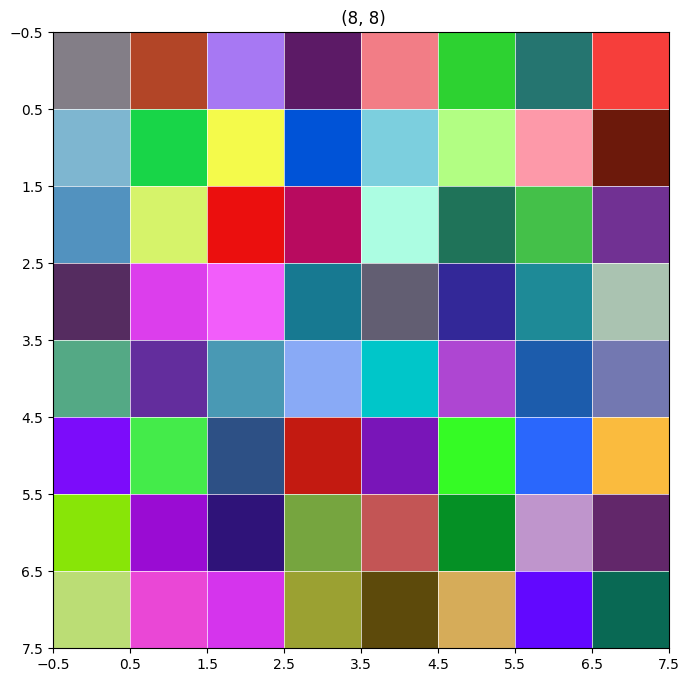

shape after upsampling:  torch.Size([1, 3, 16, 16])


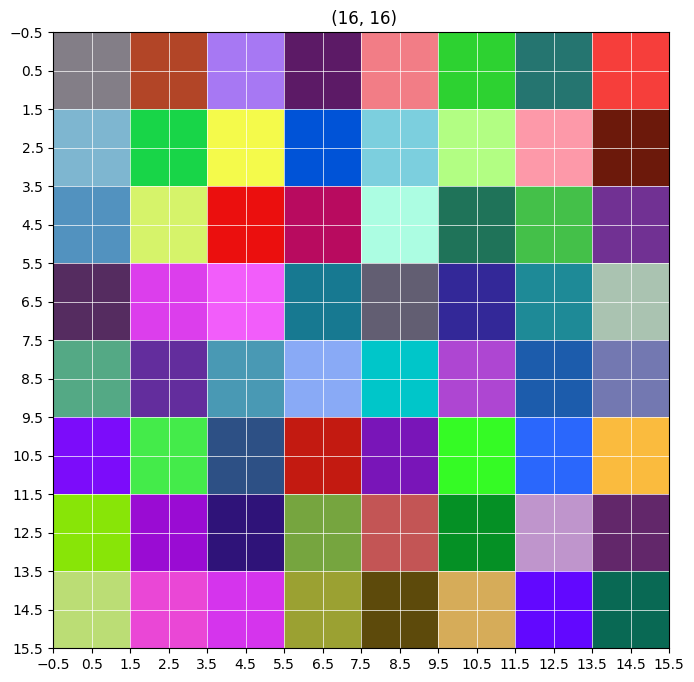

In [137]:
# NEAREST NEIGHBOR INTERPOLATION Eg.

print("input shape: ", color_input.shape)
#print("input: ", input)

# visualize the input tensor
plot_tensor(input_tensor = color_input)

# upsample the input tensor
nearest1_ = nn.Upsample(scale_factor=2, mode='nearest')
res = nearest1_(color_input)
# Upsample: is for resizing the input tensor - essentially, increasing the resolution of the image.
# scale_factor: if 2, then the height and width of the image will be doubled.
# mode: nearest - the nearest pixel value is used for the new pixels.
# other modes: bilinear, bicubic, trilinear, etc
# align_corners: if True, the corner pixels of the input and output tensors are aligned, and thus preserving the spatial dimensions.

print("shape after upsampling: ", res.shape)
#print("nearest interpolation: ", res)

# visualize the upsampled tensor
plot_tensor(input_tensor = res)

# Bilinear Interplotation

For each new pixel, take a weighted average of the 4 closest original pixels.

## B/W image

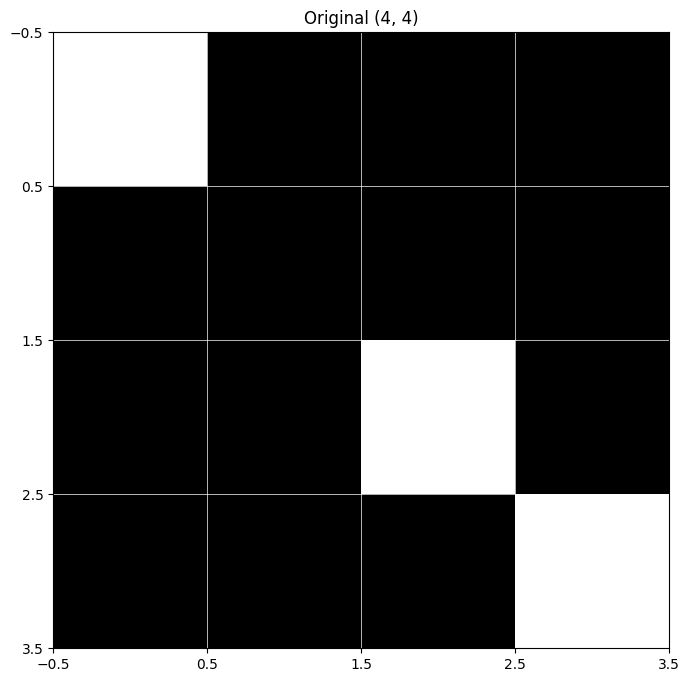

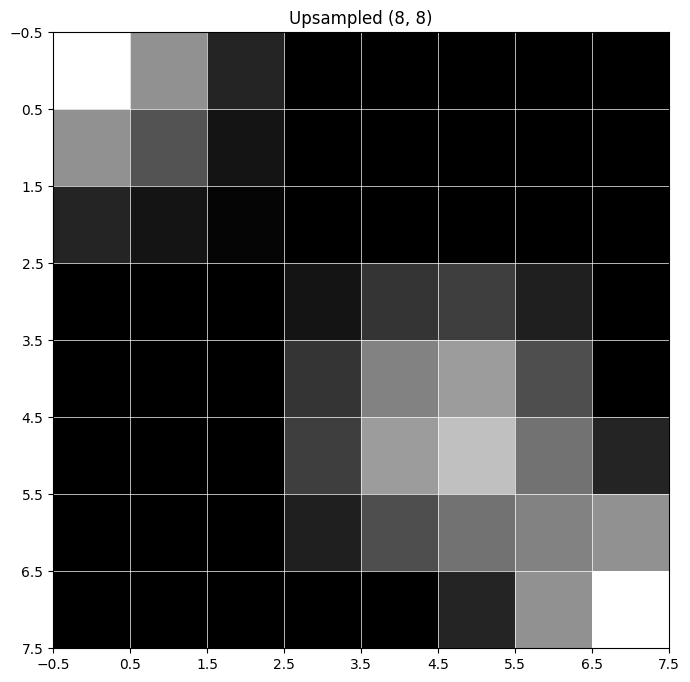

In [138]:
# BILINEAR INTERPOLATION
plot_tensor(input, "Original")

# Upsample with very large scaling
bilinear_ = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
res = bilinear_(input)
plot_tensor(res, "Upsampled")


## color image

original shape:  torch.Size([1, 3, 8, 8])


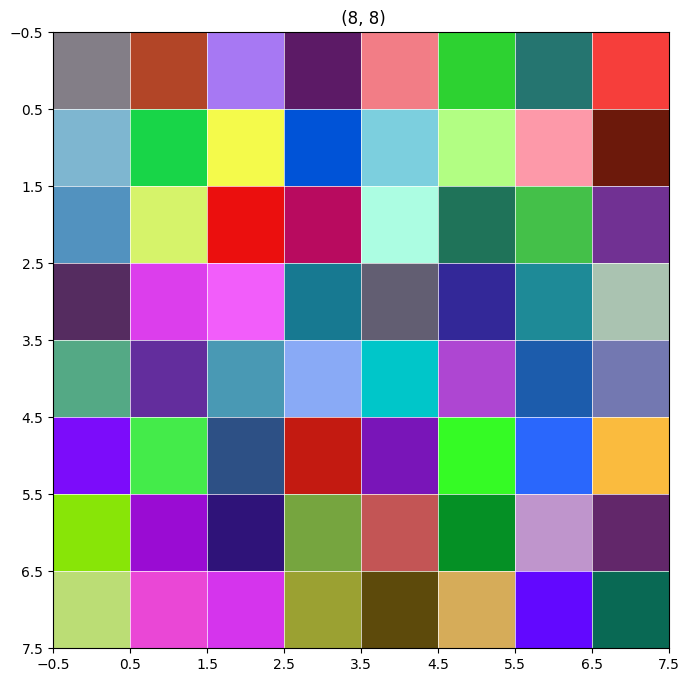

shape after upsampling:  torch.Size([1, 3, 32, 32])


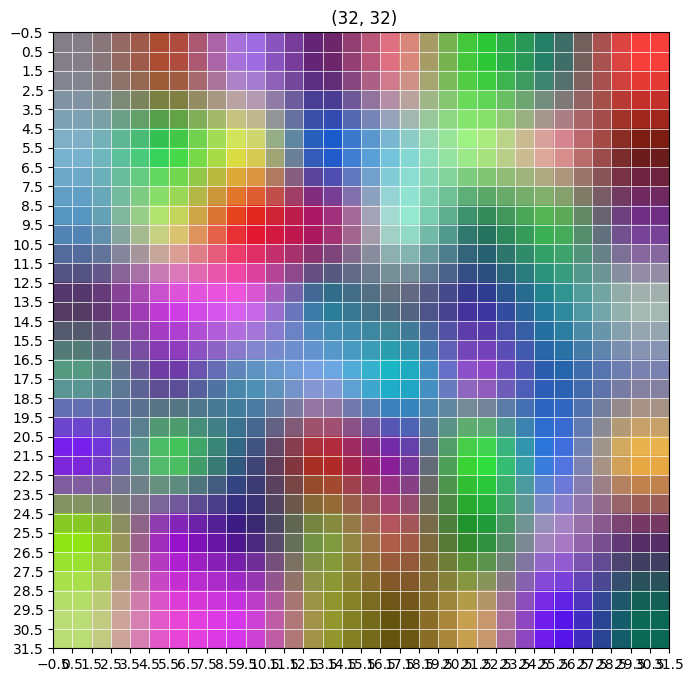

In [139]:
# BILINEAR INTERPOLATION OF COLOR IMAGE

print("original shape: ", color_input.shape)
plot_tensor(input_tensor = color_input)

bilinear1_ = nn.Upsample(scale_factor=4, mode='bilinear', align_corners=False)
res = bilinear1_(color_input)

print("shape after upsampling: ", res.shape)
plot_tensor(input_tensor = res)

# Test image

In [140]:
# convert jpg to tensor
from PIL import Image
import torchvision.transforms as transforms

# Load image from file
img = Image.open("C:\\Users\\kruth\\yolov5_from_scratch\\sample_images\\low_resolution.jpg")
print("original image size: ", img.size)

# Define transformations
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to 256x256
    transforms.ToTensor()  # Convert to Tensor -> (3, 256, 256)
])

# Apply transformations
img_tensor = preprocess(img)
print("tensor shape: ", img_tensor.shape)

# add batch dimension
img_tensor = img_tensor.unsqueeze(0)
print("tensor shape after adding batch dimension: ", img_tensor.shape)


original image size:  (800, 666)
tensor shape:  torch.Size([3, 256, 256])
tensor shape after adding batch dimension:  torch.Size([1, 3, 256, 256])


# Concatenation Operation

In [141]:
# example of concatenation of tensors

# Create two tensors
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Concatenate along rows
ab = torch.cat((a, b), dim=0)
print("Concatenated along rows:")
print(ab)

Concatenated along rows:
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


## bringing anchors from the image space to the feature space

In [142]:
from config import ANCHORS
anchors_image_space = ANCHORS
print("anchors image space: \n", anchors_image_space)

anchors image space: 
 [[(10, 13), (16, 30), (33, 23)], [(30, 61), (62, 45), (59, 119)], [(116, 90), (156, 198), (373, 326)]]


In [143]:
# convert to tensors -> float -> reshape(view)
a = torch.tensor(anchors_image_space).float()   #.view(3,-1,2)
print(a.size())
print(a)

torch.Size([3, 3, 2])
tensor([[[ 10.,  13.],
         [ 16.,  30.],
         [ 33.,  23.]],

        [[ 30.,  61.],
         [ 62.,  45.],
         [ 59., 119.]],

        [[116.,  90.],
         [156., 198.],
         [373., 326.]]])


In [144]:
a = a.view(3,-1,2) # -1 is used to infer the size of the dimension based on the other dimensions.
print(a.size()) 
print(a)

torch.Size([3, 3, 2])
tensor([[[ 10.,  13.],
         [ 16.,  30.],
         [ 33.,  23.]],

        [[ 30.,  61.],
         [ 62.,  45.],
         [ 59., 119.]],

        [[116.,  90.],
         [156., 198.],
         [373., 326.]]])


In [145]:
# for stride
# tensor -> repeat -> Transpose -> reshape
stride = [8,16,32]
stride = torch.tensor(stride).repeat(6,1) # repeat the tensor 6 times along the first dimension
print("stride: ", stride.size()) 
print("stride after repeat:\n ", stride, "\n\n")

stride = stride.T # transpose the tensor
print("stride after transpose: ", stride.size())
print("stride after transpose:\n ", stride, "\n\n")

stride = stride.reshape(3,3,2) # reshape the tensor
print("stride after reshape: ", stride.size())
print("stride after reshape:\n ", stride, "\n\n")


stride:  torch.Size([6, 3])
stride after repeat:
  tensor([[ 8, 16, 32],
        [ 8, 16, 32],
        [ 8, 16, 32],
        [ 8, 16, 32],
        [ 8, 16, 32],
        [ 8, 16, 32]]) 


stride after transpose:  torch.Size([3, 6])
stride after transpose:
  tensor([[ 8,  8,  8,  8,  8,  8],
        [16, 16, 16, 16, 16, 16],
        [32, 32, 32, 32, 32, 32]]) 


stride after reshape:  torch.Size([3, 3, 2])
stride after reshape:
  tensor([[[ 8,  8],
         [ 8,  8],
         [ 8,  8]],

        [[16, 16],
         [16, 16],
         [16, 16]],

        [[32, 32],
         [32, 32],
         [32, 32]]]) 




In [146]:
# so now, divide anchors_ with the stride

# anchors_
print(a)

# stride
print(stride)

tensor([[[ 10.,  13.],
         [ 16.,  30.],
         [ 33.,  23.]],

        [[ 30.,  61.],
         [ 62.,  45.],
         [ 59., 119.]],

        [[116.,  90.],
         [156., 198.],
         [373., 326.]]])
tensor([[[ 8,  8],
         [ 8,  8],
         [ 8,  8]],

        [[16, 16],
         [16, 16],
         [16, 16]],

        [[32, 32],
         [32, 32],
         [32, 32]]])


In [147]:
anchors_feature_space = a/ stride
print("anchors feature space: ", anchors_feature_space.size())
print(anchors_feature_space)

anchors feature space:  torch.Size([3, 3, 2])
tensor([[[ 1.2500,  1.6250],
         [ 2.0000,  3.7500],
         [ 4.1250,  2.8750]],

        [[ 1.8750,  3.8125],
         [ 3.8750,  2.8125],
         [ 3.6875,  7.4375]],

        [[ 3.6250,  2.8125],
         [ 4.8750,  6.1875],
         [11.6562, 10.1875]]])


## Test custom Architecture Implementation

On Random input tensor

In [148]:
from custom_yolov5s import YOLOV5S
import config
import time

# SET UP:
batch_size = 1
image_height = 640
image_width = 640
n_classes = 80
c2 = 32
channels = (c2*4, c2*8, c2*16)
anchors = config.ANCHORS

# sample input
x = torch.rand(batch_size, 3, image_width, image_height)  

# model
model = YOLOV5S(c2=c2, n_classes=n_classes, anchors=anchors, channels=channels)

# time taken to forward pass
start = time.time()
out = model(x)
end = time.time()

assert out[0].shape == (batch_size, 3, image_height//8, image_width//8, n_classes + 5)
assert out[1].shape == (batch_size, 3, image_height//16, image_width//16, n_classes + 5)
assert out[2].shape == (batch_size, 3, image_height//32, image_width//32, n_classes + 5)

print("Success!")
print("feedforward took {:.2f} seconds".format(end - start))
print("\n")
print("shape of output: \n",out[0].shape,"\n", out[1].shape,"\n", out[2].shape,"\n")

Success!
feedforward took 0.13 seconds


shape of output: 
 torch.Size([1, 3, 80, 80, 85]) 
 torch.Size([1, 3, 40, 40, 85]) 
 torch.Size([1, 3, 20, 20, 85]) 



## Visualization of Feature Maps

In [149]:
import matplotlib.pyplot as plt
import torch

def visualize_yolo_feature_maps(output_tensor, title="", n_channels=3, anchor_idx=0, batch_idx=0):
    """
    Visualizes channels from YOLOv5 detection head output.
    
    Args:
        output_tensor: Tensor of shape [batch, anchors, grid_h, grid_w, (5 + nc)]
        title: Plot title
        n_channels: Number of channels to visualize
        anchor_idx: Which anchor to visualize (0 to 2)
        batch_idx: Which batch item to visualize
    """
    # Detach and select first batch item and anchor
    if output_tensor.requires_grad:
        features = output_tensor.detach()[batch_idx, anchor_idx]  # [grid_h, grid_w, 85]
    else:
        features = output_tensor[batch_idx, anchor_idx]  # [grid_h, grid_w, 85]
    
    # Create subplots
    fig, axes = plt.subplots(1, n_channels, figsize=(15, 5))
    if n_channels == 1:
        axes = [axes]  # Ensure axes is always iterable
    
    # Visualize first n_channels of the 85-dimension
    for i in range(n_channels):
        channel_data = features[:, :, i].cpu().numpy()
        axes[i].imshow(channel_data, cmap='plasma')
        axes[i].set_title(f"Channel {i}")
        axes[i].axis('off')
    
    plt.suptitle(f"{title} (Grid {features.shape[0]}x{features.shape[1]})")
    plt.tight_layout()
    plt.show()

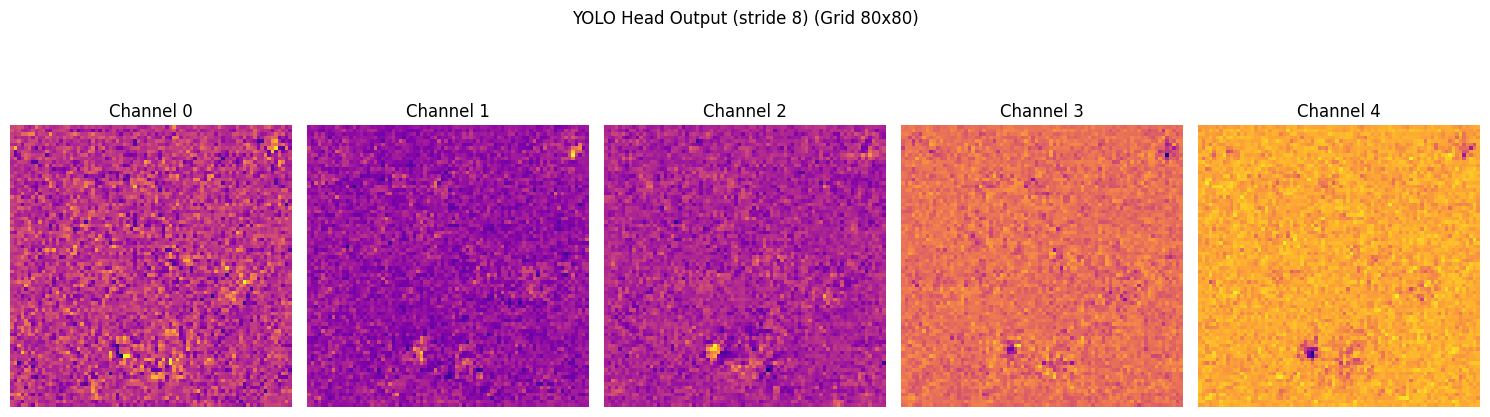

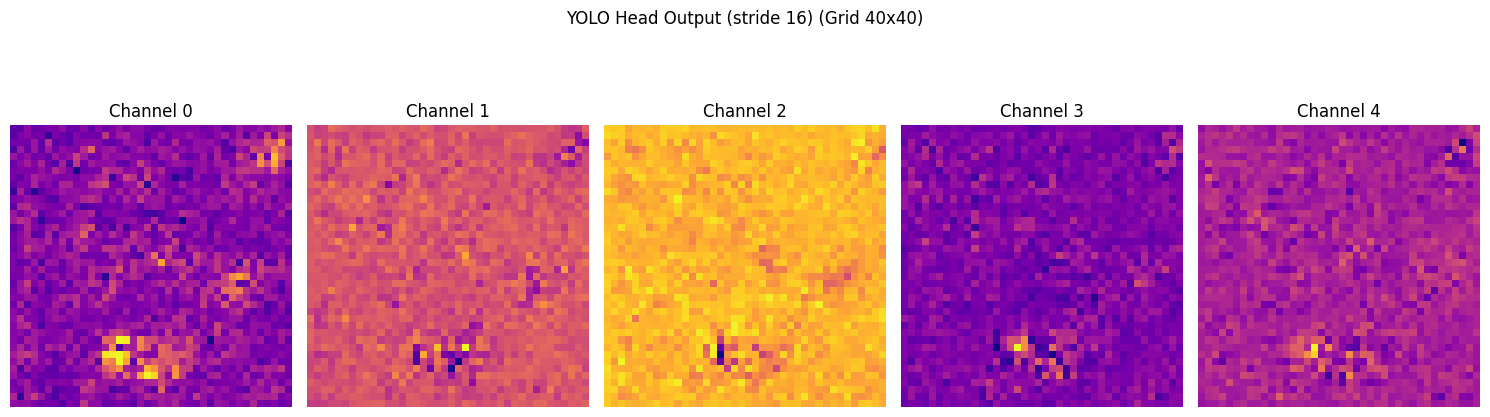

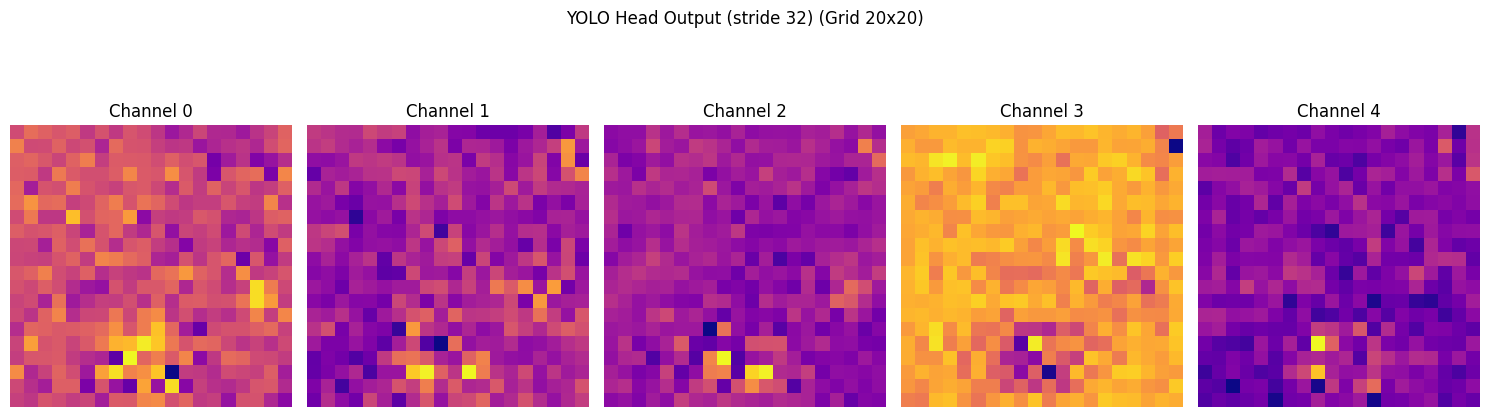

In [150]:
# plot the first channel feature maps
# Example usage with your model outputs
for i, out in enumerate(out):  # model_outputs is list of 3 detection levels
    stride = 8 * (2 ** i)  # 8, 16, 32
    visualize_yolo_feature_maps(
        out, 
        title=f"YOLO Head Output (stride {stride})",
        n_channels=5,  # Show first 5 channels (tx, ty, tw, th, obj)
        anchor_idx=0   # Show first anchor
    )

## Test on Real world images - forward pass through the model

Prepare the image

In [157]:
import torchvision.transforms as T

def prepare_image_for_yolov5(image_path, target_size=640):
    """
    Prepares an image for YOLOv5 detection head.
    
    Args:
        image_path: Path to the input image (JPG/PNG/etc)
        target_size: Size to resize to (YOLOv5 typically uses 640x640)
        
    Returns:
        torch.Tensor of shape (1, 3, target_size, target_size) - ready for model
        original_image: PIL Image for visualization
        image_ratio: (w_ratio, h_ratio) for mapping predictions back to original
    """
    # Open and validate image
    original_image = Image.open(image_path).convert('RGB')
    img_width, img_height = original_image.size
    
    # Calculate ratios for later rescaling
    w_ratio = target_size / img_width
    h_ratio = target_size / img_height
    
    # Create transformation pipeline
    transform = T.Compose([
        T.Resize((target_size, target_size)),  # Maintains aspect ratio if needed
        T.ToTensor(),                          # Converts to [0,1] range
        #T.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet normalization
                   #std=[0.229, 0.224, 0.225])
    ])
    
    # Apply transformations and add batch dimension
    image_tensor = transform(original_image).unsqueeze(0)  # (1, 3, H, W)
    
    return image_tensor, original_image, (w_ratio, h_ratio)

In [180]:
image_tensor, _, _, = prepare_image_for_yolov5(image_path="C:\\Users\\kruth\\yolov5_from_scratch\\sample_images\\moni1.jpg")
print(image_tensor.shape)

torch.Size([1, 3, 640, 640])


(-0.5, 639.5, 639.5, -0.5)

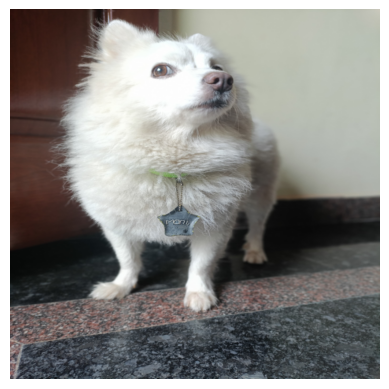

In [181]:
# show input image
plt.imshow(image_tensor.squeeze(0).permute(1, 2, 0).numpy())
plt.axis('off')


Outputs

Success!
feedforward took 0.16 seconds


shape of output: 
 torch.Size([1, 3, 80, 80, 85]) 
 torch.Size([1, 3, 40, 40, 85]) 
 torch.Size([1, 3, 20, 20, 85]) 



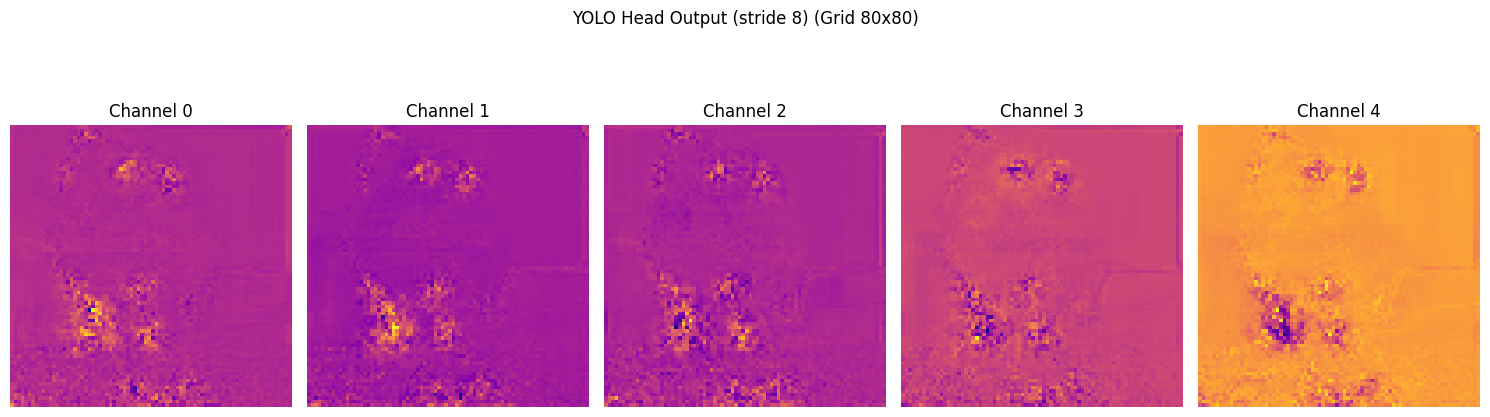

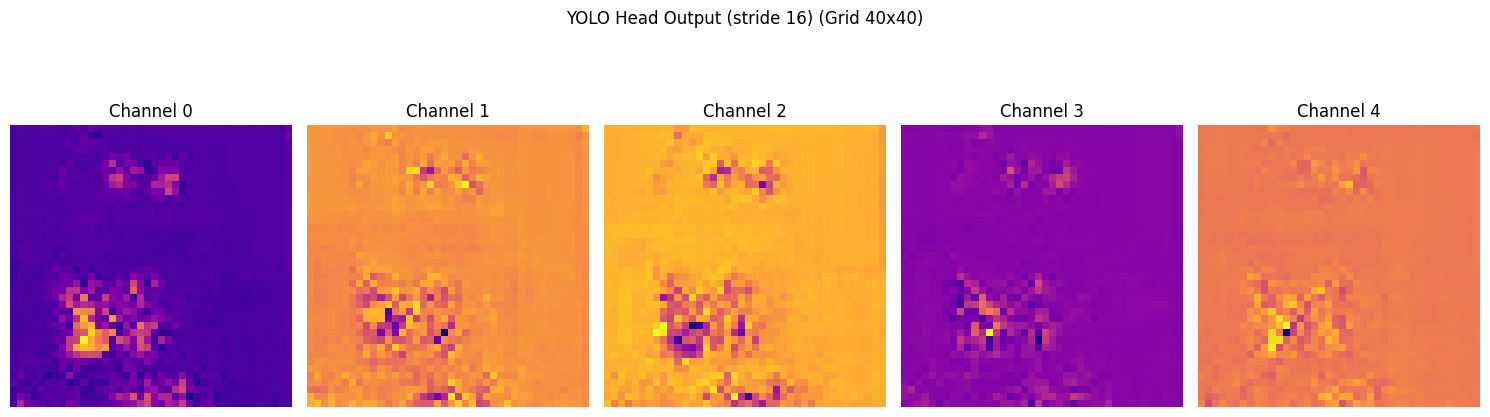

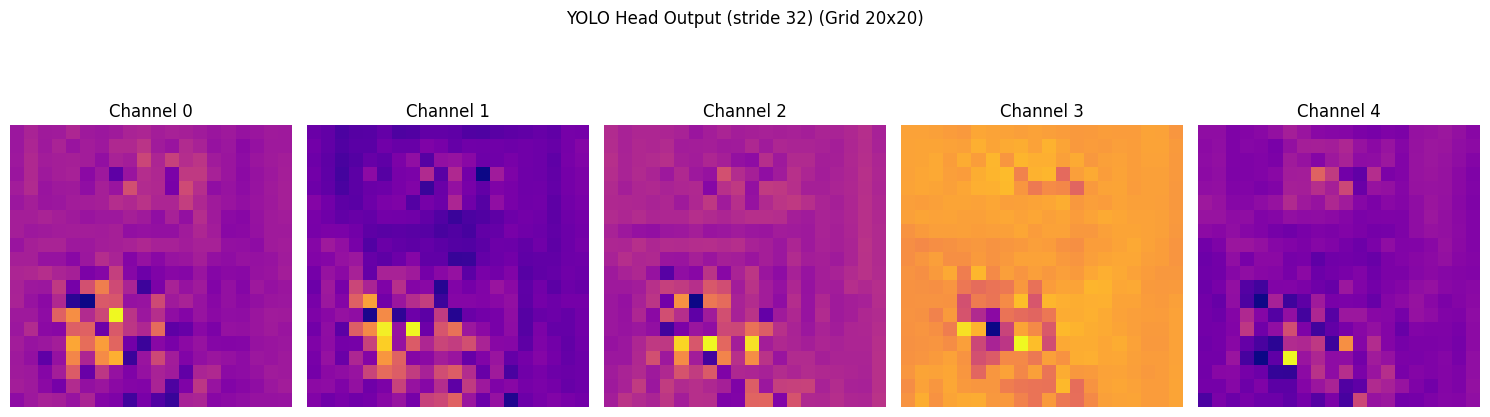

In [182]:
# time taken to forward pass
start = time.time()
out_image = model(image_tensor)
end = time.time()

print("Success!")
print("feedforward took {:.2f} seconds".format(end - start))
print("\n")
print("shape of output: \n",out_image[0].shape,"\n", out_image[1].shape,"\n", out_image[2].shape,"\n")
# plot the first channel feature maps
# Example usage with your model outputs
for i, out_image in enumerate(out_image):  # model_outputs is list of 3 detection levels
    stride = 8 * (2 ** i)  # 8, 16, 32
    visualize_yolo_feature_maps(
        out_image, 
        title=f"YOLO Head Output (stride {stride})",
        n_channels=5,  # Show first 5 channels (tx, ty, tw, th, obj)
        anchor_idx=0   # Show first anchor
    )

In [183]:
# export the model to onnx

# export to ONNX
torch.onnx.export(model, 
                x, 
                "custom_yolov5s.onnx", 
                opset_version=11,
                #do_constant_folding=False, #prevent folding of batch norm into conv,
                input_names=['input'],
                output_names=['output'],
)